<a href="https://colab.research.google.com/github/imhrishita/ML/blob/main/Keras-STP-BOD-Prediction5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
from google.colab import files
uploaded = files.upload()

Saving STP.csv to STP.csv


In [5]:
stp=pd.read_csv("STP.csv")
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  136 non-null    object 
 1   Influent BOD5         136 non-null    int64  
 2   Influent TSS          136 non-null    int64  
 3   Influent NH3          136 non-null    float64
 4   temperature           136 non-null    float64
 5   Influent pH           136 non-null    float64
 6   Influent Alkalinity   136 non-null    int64  
 7   Effluent BOD5         136 non-null    float64
 8   Effluent TSS          136 non-null    float64
 9   Effluent NH3          136 non-null    float64
 10  Aerobic NOx           136 non-null    float64
 11  Effluent pH           136 non-null    float64
 12  Field MLSS            136 non-null    float64
 13  Anoxic tank DO        136 non-null    float64
 14  Aerobic NH3           136 non-null    float64
 15  Aerobic DO            1

In [6]:
stp.pop('Influent TSS')
stp.pop('Effluent TSS')
stp.pop('Unnamed: 16')
stp.pop('Date')
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influent BOD5         136 non-null    int64  
 1   Influent NH3          136 non-null    float64
 2   temperature           136 non-null    float64
 3   Influent pH           136 non-null    float64
 4   Influent Alkalinity   136 non-null    int64  
 5   Effluent BOD5         136 non-null    float64
 6   Effluent NH3          136 non-null    float64
 7   Aerobic NOx           136 non-null    float64
 8   Effluent pH           136 non-null    float64
 9   Field MLSS            136 non-null    float64
 10  Anoxic tank DO        136 non-null    float64
 11  Aerobic NH3           136 non-null    float64
 12  Aerobic DO            136 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 13.9 KB


In [7]:
X=stp.drop(['Effluent BOD5'],axis=1).values
y=stp['Effluent BOD5'].values

In [259]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=23)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full, random_state=23)

In [260]:
X_train.shape, y_train.shape

((76, 12), (76,))

In [261]:
X_valid.shape, y_valid.shape

((26, 12), (26,))

In [262]:
X_test.shape, y_test.shape

((34, 12), (34,))

In [263]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [264]:
np.random.seed(23)
tf.random.set_seed(23)

In [265]:
inputs = keras.Input(shape=(12,))
x = keras.layers.Dense(100, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(30, activation="relu", name="dense_2")(x)
x = keras.layers.Dense(30, activation="sigmoid", name="dense_3")(x)
outputs = keras.layers.Dense(1, name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [266]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-2),
              metrics=['mae'])

In [267]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("OptimumTrainedModel.h5",save_best_only=True)

In [268]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [269]:
model_history=model.fit(X_train,y_train, epochs=500, validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/500
3/3 [==============================] - 1s 79ms/step - loss: 25.0656 - mae: 4.2629 - val_loss: 8.3907 - val_mae: 2.4482
Epoch 2/500
3/3 [==============================] - 0s 13ms/step - loss: 11.6145 - mae: 2.3867 - val_loss: 4.1916 - val_mae: 1.4388
Epoch 3/500
3/3 [==============================] - 0s 13ms/step - loss: 8.1639 - mae: 1.7863 - val_loss: 2.7938 - val_mae: 1.1328
Epoch 4/500
3/3 [==============================] - 0s 14ms/step - loss: 6.9852 - mae: 1.6327 - val_loss: 2.5398 - val_mae: 1.0931
Epoch 5/500
3/3 [==============================] - 0s 12ms/step - loss: 6.6891 - mae: 1.6100 - val_loss: 2.4165 - val_mae: 1.1047
Epoch 6/500
3/3 [==============================] - 0s 19ms/step - loss: 6.4601 - mae: 1.6366 - val_loss: 2.3852 - val_mae: 1.1142
Epoch 7/500
3/3 [==============================] - 0s 14ms/step - loss: 6.3335 - mae: 1.6517 - val_loss: 2.3501 - val_mae: 1.0784
Epoch 8/500
3/3 [==============================] - 0s 12ms/step - loss: 6.2635 - mae: 1.

In [270]:
mae_test=model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 1.9342 - mae: 1.0470


In [271]:
model_history.history

{'loss': [25.06557273864746,
  11.614545822143555,
  8.163932800292969,
  6.985248565673828,
  6.689128398895264,
  6.460139274597168,
  6.333509922027588,
  6.263501167297363,
  6.140428066253662,
  5.9541497230529785,
  5.797938346862793,
  5.695840358734131,
  5.585061550140381,
  5.4370903968811035,
  5.314941883087158,
  5.1798858642578125,
  5.191618919372559,
  4.99515962600708,
  4.867382049560547,
  4.803318500518799,
  4.821357727050781,
  4.723355770111084,
  4.6250739097595215,
  4.483719825744629,
  4.408962726593018,
  4.339489459991455,
  4.251530170440674,
  4.216345310211182,
  4.104215145111084,
  4.030046463012695,
  3.960087776184082,
  3.8814773559570312],
 'mae': [4.262878894805908,
  2.386725664138794,
  1.7862968444824219,
  1.6326534748077393,
  1.6099798679351807,
  1.6365982294082642,
  1.651738166809082,
  1.5966074466705322,
  1.631180763244629,
  1.641493797302246,
  1.612205147743225,
  1.5523381233215332,
  1.5245580673217773,
  1.5429880619049072,
  1.4

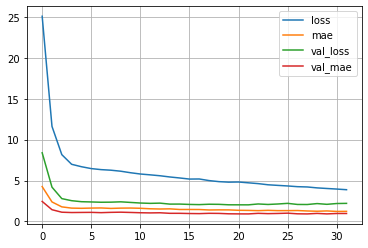

In [272]:
pd.DataFrame(model_history.history).plot(kind='line')
plt.grid(True)
plt.show()

In [273]:
y_predict=model.predict(X_test)
y_predict,y_test.round(4)

(array([[3.570185 ],
        [5.826752 ],
        [4.6209235],
        [4.1379514],
        [3.4147694],
        [4.876293 ],
        [4.767232 ],
        [3.3023865],
        [4.20686  ],
        [3.639185 ],
        [5.3939624],
        [4.570862 ],
        [3.5257874],
        [3.7950757],
        [5.2673388],
        [3.7068443],
        [4.3512793],
        [4.727999 ],
        [4.09014  ],
        [3.8229268],
        [4.292653 ],
        [5.2277403],
        [5.357838 ],
        [3.8487606],
        [4.537927 ],
        [4.35825  ],
        [4.972706 ],
        [3.6955585],
        [4.393895 ],
        [5.103547 ],
        [4.9887977],
        [3.2991793],
        [3.3346975],
        [3.7903605]], dtype=float32),
 array([2.95, 4.  , 2.  , 3.84, 2.  , 3.  , 1.  , 2.33, 5.  , 3.57, 2.  ,
        6.  , 4.  , 4.6 , 5.5 , 2.46, 3.  , 5.  , 4.  , 3.73, 4.  , 4.  ,
        4.5 , 3.87, 4.  , 5.  , 5.78, 3.5 , 4.  , 4.  , 4.2 , 1.26, 1.  ,
        4.5 ]))